## Your Name: Pragalbh Mandaokar
## The project I attempted was: (1) Tabular, (2) Image, (3) Text, (4) Time-series
(please delete as appropriate)

# CSC8111 Coursework Specification

For this coursework you will perform **THREE** short questions which cover the breadth of the machine learning module along with attempting **ONE** of the four longer project-style questions. All of the short tasks and longer project-style questions can be found in this notebook. You should provide all of your answers in this notebook and submit it to Canvas before the submission deadline.

The learning objectives of these short questions are:
- To demonstrate a wide-range of machine learning skills.
- To be able to apply the most appropriate approach at the right time.



---
## Question 1: Classification (10 marks)

Load the dataset below, where X and y are the feature (input) variables and target (output) variable. Based on this dataset, build TWO classifiers using different machine learning approaches to predict the two classes in the target variable. You are free to use any appropriate machine learning models and libraries, but you need to split the dataset into training and test sets and optimise the model's hyperparameters (e.g. using GridSearchCV()). As a result, the performance metrics of the best classifier should be reported over the test set. Please follow the steps below to complete the code.

The dataset is available at:
https://ncl.instructure.com/courses/53509/files/7659751?wrap=1 and
https://ncl.instructure.com/courses/53509/files/7659755?wrap=1


## Set up the environment and load the dataset

In [1]:
# just run this cell, don't change the code
import numpy as np
from numpy import loadtxt
X = loadtxt('cls_X.csv', delimiter=',')
y = loadtxt('cls_y.csv', delimiter=',')

## Q1.1 Split the data into training and test sets (20% for testing)

In [2]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Q1.2 Create your first classifier

#### Q1.2.1 First, make an attempt by using an appropriate machine learning method without optimising the hyperparameter(s). Report the model accuracy over the test set (i.e. test accuracy).

#### Classifier used is RandomForest Classifier

In [3]:
# write your code below to replace the ellipsis "..."
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

rf_score = accuracy_score(y_test, rf_predictions)
rf_score

0.85

#### Q1.2.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your first classifier and print out its test accuracy.

In [4]:
# write your code below to replace the ellipsis "..."
...
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_random = random_search.best_params_
rf_with_params_random = random_search.best_estimator_

# Make predictions on the test set using the best model
rf_predictions_random = rf_with_params_random.predict(x_test)

# Calculate accuracy score
rf_score_random = accuracy_score(y_test, rf_predictions_random)

# Print the best parameters and the accuracy score
print("Best Hyperparameters (RandomizedSearchCV):", best_params_random)
print("Random Forest Accuracy (RandomizedSearchCV):", rf_score_random)

Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest Accuracy (RandomizedSearchCV): 0.825


## Q1.3 Create your second classifier

#### Q1.3.1 First, without optimising the hyperparameter(s), make an attempt by using a different machine learning method to the first classifier. Report the model accuracy over the test set (i.e. test accuracy).

In [5]:
# write your code below to replace the ellipsis "..."
from sklearn.neighbors import KNeighborsClassifier

KNClassifier = KNeighborsClassifier()
KNClassifier.fit(x_train,y_train)

y_pred = KNClassifier.predict(x_test)

accuracy_KNN_classifier = accuracy_score(y_test,y_pred)

# Report the test accuracy for random forest
print(f"Test Accuracy: {accuracy_KNN_classifier:.4f}")

Test Accuracy: 0.8875


#### Q1.3.2 Then, optimise the hyperparameter(s) using the same machine learning method as above. Report the best hyperparameter(s) and, use it to make your second classifier and print out its test accuracy.



In [6]:
# write your code below to replace the ellipsis "..."
from sklearn.model_selection import GridSearchCV


KNClassifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2, 4, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, ]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Get the best hyperparameters
grid_search = GridSearchCV(estimator=KNClassifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = KNeighborsClassifier(**best_params)
best_rf_classifier.fit(x_train, y_train)

y_pred = best_rf_classifier.predict(x_test)

accuracy_KNN_classifier = accuracy_score(y_test,y_pred)

# Report the test accuracy for random forest
print(f"Test Accuracy: {accuracy_KNN_classifier:.4f}")

Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Test Accuracy: 0.8750


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already performed the grid search and obtained the best classifiers

# Evaluate the best KNN classifier
y_pred_knn = best_rf_classifier.predict(x_test)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Classifier Metrics:")
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)



KNN Classifier Metrics:
Precision: 0.8765664160401002
Recall: 0.875
F1 Score: 0.8752357008170961
Confusion Matrix:
[[32  4]
 [ 6 38]]


## Q1.4 Report the precision, recall, f1 score and confusion matrix on the best of the two classifiers

Average F1 score: 0.8837209302325582


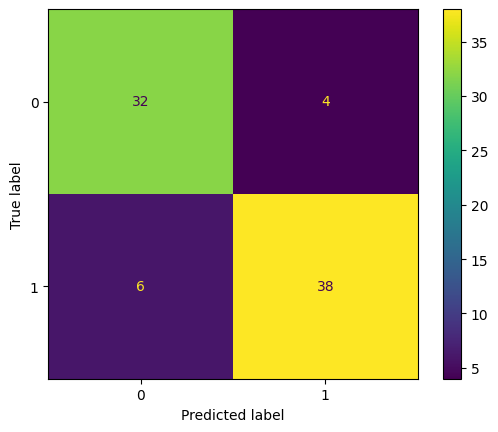

In [8]:
# write your code below to replace the ellipsis "..."
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

score = metrics.f1_score(y_test,y_pred_knn)
print("Average F1 score: {0}".format(np.average(score)))

cm = metrics.confusion_matrix(y_test, y_pred_knn)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

---
## Question 2: Regression (10 marks)

In this question you are given a simple dataset which you will perform regression on to predict values. You will build TWO Regression models and then take the best one and perform hyperparameter tuning on it.

## Set up the environment

In [9]:
import numpy as np
import pandas as pd

## Read in the data

You'll need to download the data.csv file from https://ncl.instructure.com/courses/53509/files/7657710?wrap=1 and upload it to your Google Drive. I placed it in a folder called data. Then you need to mount your Google Drive in Colab (cell below).

In [10]:
data = pd.read_csv('data.csv')

Then read in the data

## Q2.1 Split the data into X and y

X is the first three columns

y is the last column

In [11]:
# your answer here
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)


(999, 3)
(999,)


### Q2.2 Create the Train and Test datasets

20% of the data is kept back for testing

In [12]:
# your answer here
from sklearn.model_selection import train_test_split
R_train, R_test, S_train, S_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Q2.3 Use TWO Regression approaches on the dataset

In each case report the R^2 value against the test data.

Q2.3.1 Regression approach 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(R_train)

R_train =  scaler.transform(R_train)
R_test = scaler.transform(R_test)

regr = linear_model.LinearRegression()
regr.fit(R_train,S_train)


LinearRegression()

In [14]:
from sklearn.metrics import r2_score
S_train_predict = regr.predict(R_train)
mse = (r2_score(S_train,S_train_predict))

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")
S_test_predict = regr.predict(R_test)
mse = (r2_score(S_test,S_test_predict))

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))


The model performance for training set
--------------------------------------
MSE is 0.8545046291277549


The model performance for testing set
--------------------------------------
MSE is 0.835312677177297


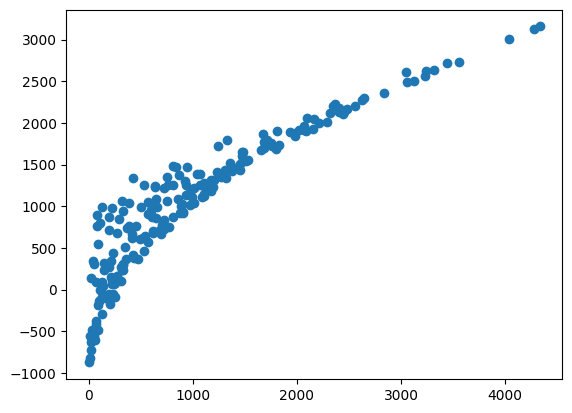

In [15]:
plt.scatter(S_test, S_test_predict)
plt.show()

Q2.3.2 Regression approach 2

In [16]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import mean_squared_error
print(X.shape)
print(y.shape)

X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(999, 3)
(999,)
(199, 3)
(800, 3)
(199,)
(800,)


In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train =  scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(y_test.shape)

(800,)


In [18]:
np.mean(X_train, axis=0)

array([ 1.14927610e-16,  2.34318427e-17, -3.47572334e-16])

In [19]:

model = RandomForestRegressor()
model.fit(X_train,y_train)

y_test_pred = model.predict(X_test)

r2score = r2_score(y_test, y_test_pred)
print(f"Accuracy: {r2score}")

Accuracy: 0.9709226536848244


###  Q2.4 Optimise the hyperparameters

Take your best Regression approach from above and identify the best hyperparameters. Note as some Regression approaches have many hyperparameters you may limit yourself here to just THREE.

Q2.4.1 Search for the best hyperparameters

In [20]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 200, 300],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [1,2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a RandomForestRegressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)

# Train the regressor on the full training set
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
mse = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\

Best Hyperparameters: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.9708247868513885


Q2.4.2 Output the best hyperparameters found

In [21]:
# your answer here
print(best_params)

{'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 200}


Q2.4.3 Show the results for the best model


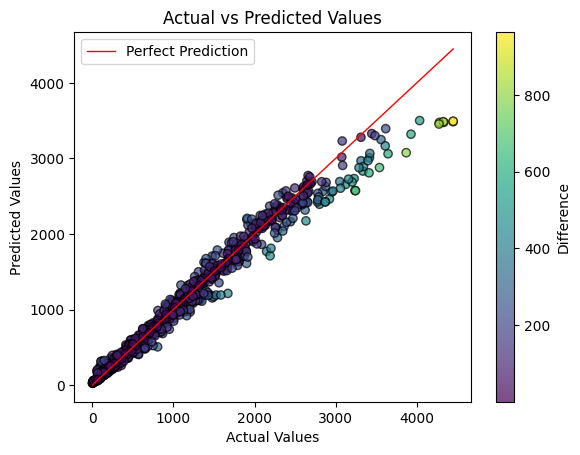

In [22]:
# your answer here

import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
color_gradient = np.abs(y_pred - y_test)

# Plotting the predicted vs actual values with different colors
scatter = plt.scatter(y_test, y_pred, c=color_gradient, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(scatter, label='Difference')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=1, label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

---
##  Question 3: Deep Learning (10 marks)

Q3.1 For MNIST dataset, implement a deep learning model with 3 hidden layers with layer size: 128, 256, 50.


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.datasets import mnist
import keras.utils as utils

batch_size = 128
nb_classes = 10
im_dim = 784 # the total pixel number
nb_epoch = 2

In [24]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, im_dim)
X_test = X_test.reshape(10000, im_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [25]:
# Write down your code about MLP model for question Q3.1 here
# you should call your model 'model'
# ...
from keras import layers, models
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(784,)))

# Hidden layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(50, activation='relu'))


Add code to output your network structure

In [26]:
# your code here
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the model for just two epochs to show it works. All code provided - just run.

In [27]:
# Train
history = model.fit(X_train, Y_train, epochs=nb_epoch,
                    validation_split = 0.2,
                    batch_size=batch_size, verbose=1)

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

Epoch 1/2
375/375 [==============================] - 4s 7ms/step - loss: 0.3364 - accuracy: 0.9005 - val_loss: 0.1621 - val_accuracy: 0.9518
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.1257 - accuracy: 0.9628
Summary: Loss over the test dataset: 0.13, Accuracy: 0.96


Q 3.2 For MNIST dataset, implement a CNN model with only one 2D CNN layer as the hidden layer.

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
# Write down your code about the CNN model of Q3.2 here
# you should call your model 'model'
# ...

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten layer
model.add(layers.Flatten())



Add code to output your network structure

In [30]:
# your code here

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
938/938 [==============================] - 20s 20ms/step - loss: 0.2670 - accuracy: 0.9249 - val_loss: 0.1106 - val_accuracy: 0.9671
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0977 - accuracy: 0.9721 - val_loss: 0.0822 - val_accuracy: 0.9744
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0720 - accuracy: 0.9785 - val_loss: 0.0650 - val_accuracy: 0.9784
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0510 - accuracy: 0.9850 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0561 - val_accuracy: 0.9814
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.0561 - val_accuracy: 0.9817
Ep

We just train for two epochs to demonstrate that the network does work. Just run it.

In [31]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, shuffle=True ,
              validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (score[0], score[1]))

Epoch 1/2


375/375 [==============================] - 6s 15ms/step - loss: 0.0207 - accuracy: 0.9947 - val_loss: 0.0193 - val_accuracy: 0.9946
Epoch 2/2
375/375 [==============================] - 6s 16ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0214 - val_accuracy: 0.9932
Summary: Loss over the test dataset: 0.05, Accuracy: 0.98


---
---
---
#Mini-projects: Introduction

The remainder of this document defines four project-style questions which go more deeply into one of the areas from the module. You should pick **ONE** of these project-stye questions to answer.

The learning objectives of this assignment are:
1. To learn about the design of machine learning analysis pipelines
2. To understand how to select appropriate methods given the dataset type
3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
4. To critically evaluate the performance of the designed machine learning pipelines
5. To learn and practice the skills of reporting machine learning experiments

For this coursework you will be provided with a choice of four different datasets of different nature
1. A tabular dataset (defined as a classification problem)
2. An image dataset
3. A text dataset
4. A time series dataset

Your job is easy to state: You should pick ONE out of these four options and design a range of machine learning pipelines appropriate to the nature of each of the selected datasets. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

## Deliverables
An inline report and code blocks addressing the marking scheme below. The report should have 1000 to 2000 words. The word count excludes references, tables, figures and section headers, and has a 10% leeway.

## Marking scheme

- Writing Style, references, figures, etc. 7 marks
- Dataset exploration 7 marks
- Methods 21 marks
- Results of analysis 21 marks
- Discussion 14 marks

---
---
## Project 1: Tabular dataset (70 marks)

The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/53509/files/7652449/download?download_frd=1

Experiments on the tabular dataset will be relatively fast compared to the other three options. To compensate, we expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models, hyperparameter tuning and cross-validation evaluation.

## Your answer below

---
---
## Project 2: Image dataset (70 marks)

The FMNISTMash dataset is an extension to the FMNIST dataset. In each 3-colour channel image there is one FMNIST image in each channel (see example below). The idea is to predict the number of unique classes in the three channels (0 - all images are of the same class, 1 - two different classes, 2 - three different classes). So for the example image there is a top and two jackets so lable is 1. Please download the data from:

|Data| URL|
|---|------|
|Train X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_x.npy |
| Train y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/train_y.npy |
| Validate X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_x.npy |
| Validate y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/valid_y.npy |
| Test X | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_x.npy |
| Test y | http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/FMNISTMash/test_y.npy |

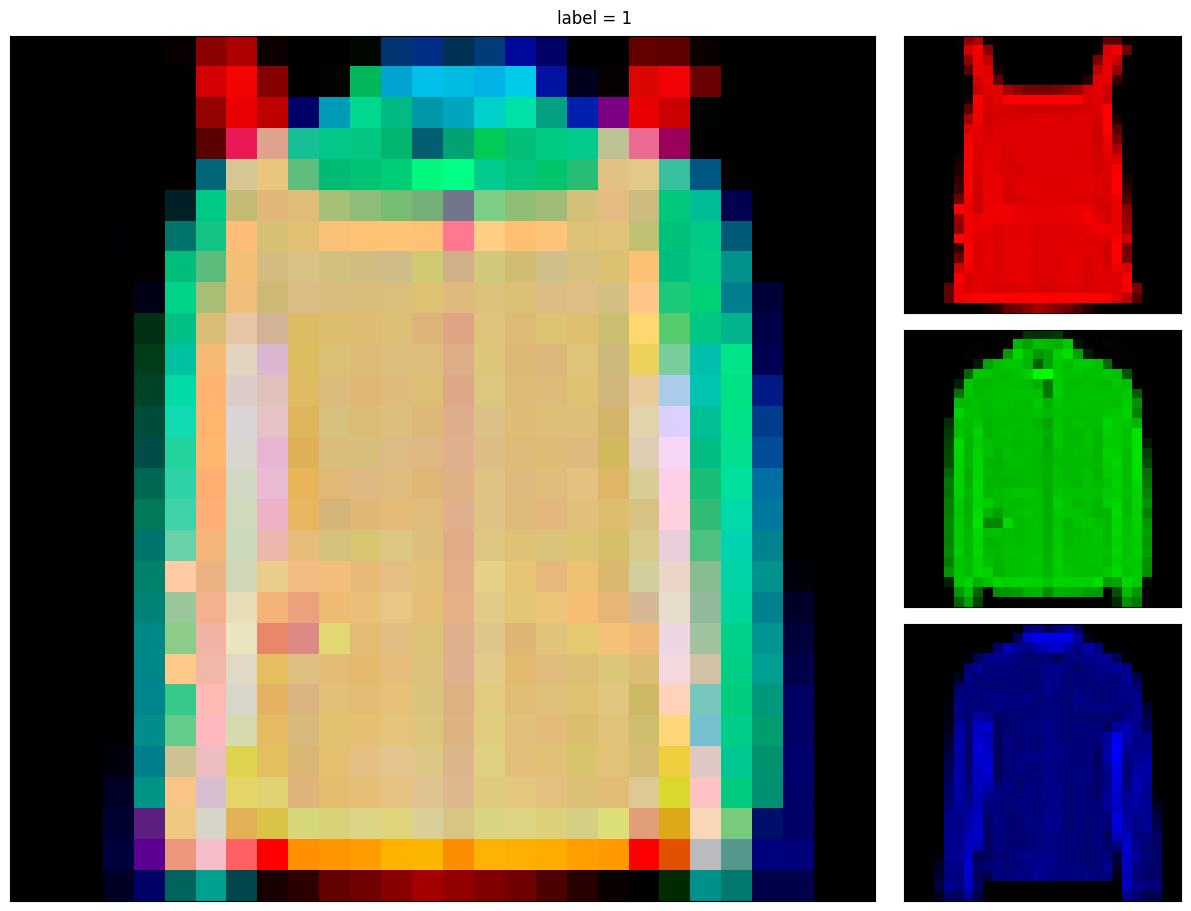
Figure 1: Example image from the FMNISTMash dataset, class label is 1

Your task is to produce TWO models for predicting the class of the image. Note: you can do ONE model which splits the image into its separate colour channels and performs a classification on them separately, but the other MUST work on all three chanels together.

Some hints:
- The code below shows you how to load and view the data.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it. Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

To load the data, we reccomend storing it in your Google Drive, this means you won't need to load it into the local colab storage every time you open the notebook.

The following import will allow your notebook to connect to Google Drive. When you run this cell a seperate window will pop up asking you to grant Drive access to colab. Grant it access to the account which contains FMNISTMash

## Load the data

The dataset is stored as six Numpy files, so to load them we will need to import Numpy. Before loading each file into its own vaiable.

**Note: you'll need to change the location of the file to wherever you stroed your files.**

In [32]:
import numpy as np

train_x = np.load('/content/drive/MyDrive/data/FMNISTMash/train_x.npy', allow_pickle = True)
train_y = np.load('/content/drive/MyDrive/data/FMNISTMash/train_y.npy', allow_pickle = True)
valid_x = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_x.npy', allow_pickle = True)
valid_y = np.load('/content/drive/MyDrive/data/FMNISTMash/valid_y.npy', allow_pickle = True)
test_x = np.load('/content/drive/MyDrive/data/FMNISTMash/test_x.npy', allow_pickle = True)
test_y = np.load('/content/drive/MyDrive/data/FMNISTMash/test_y.npy', allow_pickle = True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/FMNISTMash/train_x.npy'

## Check the shape of the data
Make sure the data is loaded and in the shape that you expect, FMNISTMash has 50,000 training images, 10,000 validation images, and 10,000 testing images.

In [ ]:
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
print(f'valid_x shape: {valid_x.shape}')
print(f'valid_y shape: {valid_y.shape}')
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

train_x shape: (50000, 3, 28, 28)
train_y shape: (50000,)
valid_x shape: (10000, 3, 28, 28)
valid_y shape: (10000,)
test_x shape: (10000, 3, 28, 28)
test_y shape: (10000,)


## Displaying the Images

### Displaying the single image

To display the images we are going to be using MatPlotLib, so we need to import that, standard practice is to import it as plt

In [ ]:
import matplotlib.pyplot as plt

The following two functions aren't necessary, they simply remove the axis ticks and numbers from the rendered image and perform some normalisation to the image.

In [ ]:
def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

In [ ]:
def image_normalisation(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

We construct the figure using plt, pyplot expects the colour channel to be last, the data is saved in a channels_first format so needs to be converted which is what we used np.move_axis for.

In [ ]:
def display_image(x, y):
    fig = plt.figure()
    main_ax = fig.add_subplot()
    fig.suptitle('label = '+ str(y))
    main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)
    plt.show()

## Pick a random example and plot it

We want to plot a random image, so we import random and pick a random index using the number of images in train_x as a limit.

In [ ]:
import random

ri = random.randrange(train_x.shape[0])

We now render the image, the label indicates how many different FMNIST classes appear in the image.

- 0 = All images are the same class
- 1 = Two images share the same class
- 2 = All images are from different classes

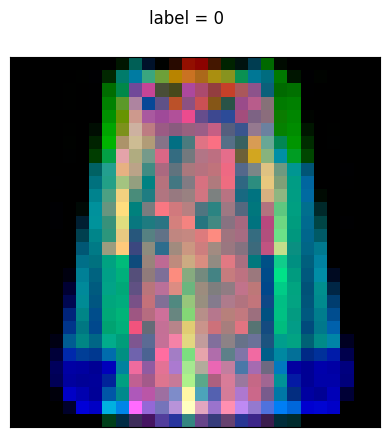

In [ ]:
display_image(train_x[ri], train_y[ri])

## Splitting the Image

This next section is just to make the dataset easier to understand. We will display the image, and then the three images that make it up seperately.

In [ ]:
def show_mnist_examples(x, y):
  fig = plt.figure(constrained_layout=True,figsize=(12,9), dpi=100)
  gs = fig.add_gridspec(3,4)
  main_ax = fig.add_subplot(gs[:3,:3])
  fig.suptitle('label = '+ str(y))
  main_ax.imshow(image_normalisation(np.moveaxis(x, 0, -1)))
  disable_ax_ticks(main_ax)

  for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalisation(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
  plt.show()

Hopefully, you will see the same image rendered early along with the images in the respective colour channels, and you should be able to see which ones share a class from FMNIST and which ones differ. Careful though, as some classes are similar to others.

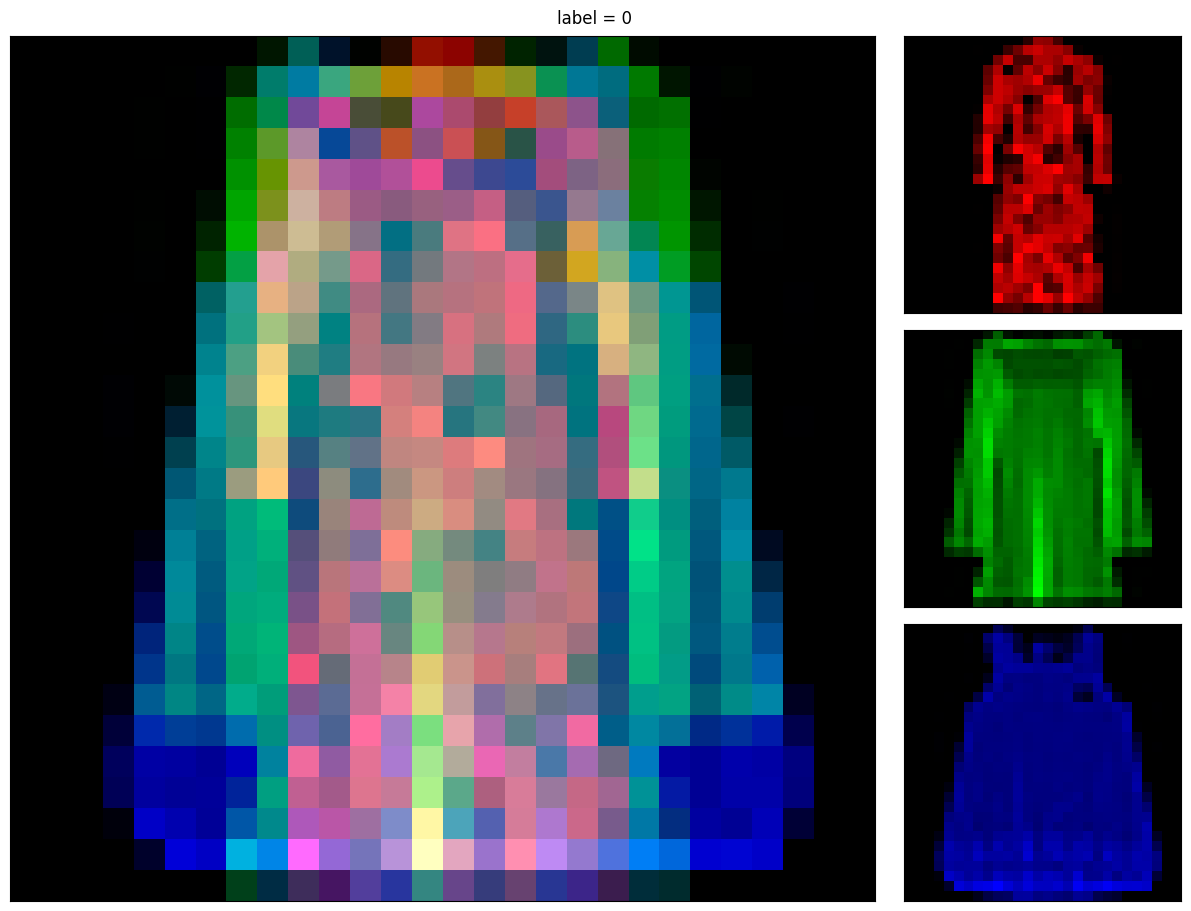

In [ ]:
show_mnist_examples(train_x[ri], train_y[ri])

## Your answer below

---
---
## Project 3: Text dataset (70 marks)

Dataset: sentiment analysis dataset (on canvas: (https://ncl.instructure.com/courses/53509/files/7666186?wrap=1), (https://ncl.instructure.com/courses/53509/files/7666193?wrap=1), (https://ncl.instructure.com/courses/53509/files/7666197?wrap=1)).
Each sample in the dataset represents a tweet. Each tweet has a sentiment label (Positive, Negative, Neutral).

**Task Description:** Apply **a combination of** different approaches including pre-processing techniques, shallow and deep classifiers, ensembled approaches, machine learning approaches beyond supervised learning if applicable, data augmentation if applicable to predict the sentiment of the test set. Try your best to improve the prediction results.

Primary **Evaluation metrics: F-1 measure**. Though you should also use others.

## Your answer below


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('Tweets_train.csv')
print(data)
# Data exploration and preprocessing
# (Add your code for exploring and preprocessing the data here)

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['text'], data['airline_sentiment'], test_size=0.2, random_state=42
)

# Feature engineering
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data)
X_test = tfidf_vectorizer.transform(test_data)

# Shallow classifiers
nb_classifier = SVC()
rf_classifier = RandomForestClassifier()
lr_classifier = LogisticRegression()

# Deep classifiers (use appropriate deep learning library)
# (Add your code for deep learning models here)

# Ensemble Approaches
voting_classifier = VotingClassifier(
    estimators=[('nb', nb_classifier), ('rf', rf_classifier), ('lr', lr_classifier)],
    voting='hard'
)

# Train models
nb_classifier.fit(X_train, train_labels)
rf_classifier.fit(X_train, train_labels)
lr_classifier.fit(X_train, train_labels)
voting_classifier.fit(X_train, train_labels)

# Evaluate models
def evaluate_model(classifier, X_test, y_test):
    predictions = classifier.predict(X_test)
    print(classification_report(y_test, predictions))

print("Naive Bayes Classifier:")
evaluate_model(nb_classifier, X_test, test_labels)

print("Random Forest Classifier:")
evaluate_model(rf_classifier, X_test, test_labels)

print("Logistic Regression Classifier:")
evaluate_model(lr_classifier, X_test, test_labels)

print("Voting Classifier:")
evaluate_model(voting_classifier, X_test, test_labels)

# Data Augmentation (if applicable)
# (Add your code for data augmentation here)

# Beyond Supervised Learning (if applicable)
# (Add your code for unsupervised or semi-supervised approaches here)


                 tweet_id                                               text  \
0      569179849518161920                    @united you're good. Thank you!   
1      569835751275433984  @AmericanAir way to ruin a vacation, my brothe...   
2      568588936852799488  @JetBlue yes thankfully! Catering just got her...   
3      569525116725567491  @USAirways The automated message isn't helpful...   
4      568807823187976193  @JetBlue I'm #MakingLoveOutofNothingAtAll on m...   
...                   ...                                                ...   
11853  570123872168574976  @AmericanAir will not help us on the phone, at...   
11854  570063683256242177  @USAirways has the worst customer service line...   
11855  568032524749942784  @USAirways grades for this trip:\n\nFlight tim...   
11856  569705813142409217  @united Thanks for the vague canned response t...   
11857  569976114124349440  @united already did that at the airport and 12...   

      airline_sentiment  
0            

c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Broodingspace\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.80      0.96      0.87      1461
     neutral       0.72      0.47      0.57       535
    positive       0.84      0.60      0.70       376

    accuracy                           0.79      2372
   macro avg       0.78      0.67      0.71      2372
weighted avg       0.79      0.79      0.77      2372

Random Forest Classifier:
              precision    recall  f1-score   support

    negative       0.75      0.96      0.84      1461
     neutral       0.68      0.36      0.47       535
    positive       0.80      0.45      0.58       376

    accuracy                           0.74      2372
   macro avg       0.75      0.59      0.63      2372
weighted avg       0.74      0.74      0.72      2372

Logistic Regression Classifier:
              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1461
     neutral       0.70      0.51      0.59    

---
---
## Project 4: Time-serise dataset (70 marks)

The Weather dataset is a time-series dataset collected by a Raspberry Pi computer at a home in Newcastle. It contains a bunch of different features about the weather collected over an approximate 12-month period. The features are as follows:

| Column no | Feature                                                  |
|-----------|----------------------------------------------------------|
|         1 | Date and time in standard Linux format                   |
|         2 | Temperature from the first internal sensor (Celsius)     |
|         3 | Outside temperature (Celsius)                            |
|         4 | CPU Temperature (Celsius)                                |
|         5 | Count (always 1)                                         |
|         6 | Temperature from the second internal sensor (Celsius)    |
|         7 | Air Pressure (mmHg)                                      |
|         8 | Humidity (percentage)                                    |

Readings are measured in one-minute intervals between November 2021 and December 2022. Your task is to try and predict future values 5, 10, 15, 30 minutes into the future along with 1, 2, 6 and 12 hours into the future. I.e. given a time-sequence of measurements before 10:20am on Friday 3rd June 2022 how accurately can you predict the values for 10:25, 10:30, 10:35 and 10:50am and for 11:20, 12:20, 16:20 and 22:20. You can do this for any of the 6 weather features (not date or count). You should separate out a test set of the last 2 months of data (you need to have a continuous and separate test set to prevent leakage between training and testing).

The dataset can be downloaded from:
http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/weather.csv

Some hints:
- There is some code below which shows you how to load and view the data to get you started.
- In order to score top marks for this dataset you should demonstrate multiple models, at least one of them should not use Deep Learning.
- To speed up your work here are some hints (assuming you’re using Colab):
 - Make sure you set the Runtime type to either GPU or TPU.
 - Copy the data to your Google drive so you don’t have to keep uploading it.
 - As the dataset is large you might want to do some of your initial testing on a subset of the data.

## Access to the files

The file is available from: http://homepages.cs.ncl.ac.uk/stephen.mcgough/data/log.txt

You can upload the file each time you use them, but this might take some time as they are quite large. An eisier option is to uploade them to a Google drive folder and mount this.

Full information on how to do this can be found at: https://colab.research.google.com/notebooks/io.ipynb

In the code below I have created a folder in Google drive called data and placed the file above in it.

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.

## Load the data

The data is stored in mumpy data files. You can use numpy.load() to read these in.

**Note: you'll need to change the location of the file to wherever you stored your files.**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('/content/drive/MyDrive/data/log.txt', delimiter=',')

In [ ]:
print(data)

## Data structure

The columns are:
0. Date and time
1. Inside temperature 1
2. Outside temperature
3. CPU Temperature
4. Count
5. Inside temperature 2
6. Air Pressure (mmHg)
7. Humidity (%)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(data[:, [1]])
plt.plot(data[:, [2]])
plt.plot(data[:, [3]])
plt.plot(data[:, [4]])
plt.plot(data[:, [5]])
plt.plot(data[:, [6]])
plt.plot(data[:, [7]])

## Your answer below